In [1]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations



     ---------------------------------------- 1.5/1.5 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 444.1/444.1 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 444.1/444.1 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 35.6/35.6 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 113.5/113.5 KB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 7.7/7.7 MB 10.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     --------

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [519 lines of output]
  setup.py:14: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext
  Partial import of skimage during the build process.
  Compiling C:\Users\EMILY\AppData\Local\Temp\pip-install-oehhfsmu\scikit-image_912f5c43136543c8bc0c174f9de55651\skimage\morphology\_skeletonize_3d_cy.pyx because it changed.
  [1/1] Cythonizing C:\Users\EMILY\AppData\Local\Temp\pip-install-oehhfsmu\scikit-image_912f5c43136543c8bc0c174f9de55651\skimage\morphology\_skeletonize_3d_cy.pyx
  running bdist_wheel
  running build

In [38]:
import os
import time
import uuid
import cv2

In [97]:
pip install opencv-python


  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acesso negado: 'C:\\Users\\EMILY\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [13]:
import os
import time
import uuid
import cv2


In [14]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [213]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'
You should consider upgrading via the 'C:\Users\EMILY\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [52]:

import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt


In [16]:

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [17]:
tf.config.list_physical_devices('GPU')


[]

In [18]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=False)

In [19]:
images.as_numpy_iterator().next()


b'data\\images\\0c31e2d4-feb1-11ec-b82a-b00cd1f01b48.jpg'

In [56]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [57]:
images = images.map(load_image)

In [58]:
images.as_numpy_iterator().next()


array([[[ 18,  26,  11],
        [ 20,  28,  13],
        [ 21,  29,  18],
        ...,
        [ 25,  27,  24],
        [ 25,  27,  24],
        [ 26,  28,  25]],

       [[ 19,  27,  12],
        [ 20,  28,  15],
        [ 21,  29,  18],
        ...,
        [ 25,  27,  24],
        [ 25,  27,  24],
        [ 26,  28,  25]],

       [[ 20,  28,  15],
        [ 20,  28,  15],
        [ 22,  28,  18],
        ...,
        [ 26,  28,  25],
        [ 25,  27,  24],
        [ 26,  28,  25]],

       ...,

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [ 14,  19,  13],
        [ 14,  19,  15],
        [ 15,  20,  14]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [ 15,  21,  17],
        [ 15,  21,  19],
        [ 14,  20,  16]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [ 15,  21,  19],
        [ 16,  22,  20],
        [ 14,  20,  18]]

In [48]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [49]:
image_generator = images.batch(4).as_numpy_iterator()



In [50]:
plot_images = image_generator.next()



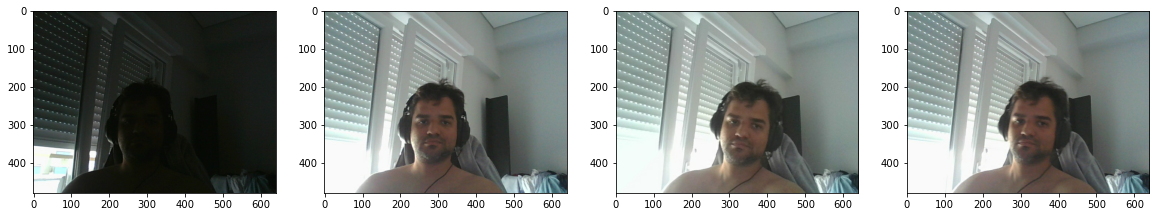

In [51]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()


In [52]:
import os 

In [53]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

In [33]:
import albumentations as alb

In [2]:
pip install albumentations

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit_learn-0.24.2-cp310-cp310-win_amd64

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit_learn-0.24.2-cp310-cp310-win_amd64 (from versions: none)
ERROR: No matching distribution found for scikit_learn-0.24.2-cp310-cp310-win_amd64
You should consider upgrading via the 'C:\Users\EMILY\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install scikit-learn

  Using cached scikit_learn-1.1.1-cp310-cp310-win_amd64.whl (7.3 MB)
  Using cached scipy-1.8.1-cp310-cp310-win_amd64.whl (36.9 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\EMILY\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Note: you may need to restart the kernel to use updated packages.


In [34]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [35]:
img = cv2.imread(os.path.join('data','train', 'images','0d32a582-feb1-11ec-9cec-b00cd1f01b48.jpg'))

In [36]:
with open(os.path.join('data', 'train', 'labels', '0d32a582-feb1-11ec-9cec-b00cd1f01b48.json'), 'r') as f:
    label = json.load(f)


In [37]:
label['shapes'][0]['points']


[[255.5985401459854, 200.45985401459853],
 [437.35036496350364, 406.29927007299267]]

In [38]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [39]:

coords

[255.5985401459854, 200.45985401459853, 437.35036496350364, 406.29927007299267]

In [40]:
coords = list(np.divide(coords, [640,480,640,480]))

In [41]:
coords

[0.39937271897810217,
 0.41762469586374695,
 0.6833599452554744,
 0.8464568126520681]

In [42]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [43]:
augmented['bboxes'][0][2:]

(0.803000811030008, 0.5923114355231144)

In [44]:
augmented['bboxes']

[(0.39910786699107864,
  0.13489051094890514,
  0.803000811030008,
  0.5923114355231144)]

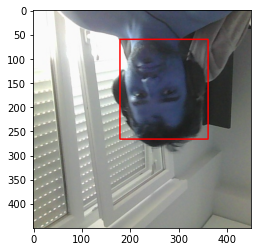

In [45]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

#  5

In [53]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.13135264598540144, 0.7810675182481751, 0.0, 0.42291666666666666, 'face'].


In [59]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [60]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [61]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [62]:
train_images.as_numpy_iterator().next()


array([[[0.23602942, 0.28106618, 0.26887256],
        [0.284375  , 0.31985295, 0.3110294 ],
        [0.13664216, 0.18088235, 0.16832107],
        ...,
        [0.1877451 , 0.20784314, 0.19215687],
        [0.23082107, 0.2661152 , 0.25373775],
        [0.31721812, 0.36519608, 0.35245097]],

       [[0.16525735, 0.209375  , 0.20398284],
        [0.29295343, 0.32830882, 0.32579657],
        [0.23088235, 0.27794117, 0.27107844],
        ...,
        [0.2129902 , 0.22138481, 0.21887255],
        [0.26795343, 0.3096814 , 0.2958946 ],
        [0.6030637 , 0.66678923, 0.6447304 ]],

       [[0.12683824, 0.16311274, 0.16850491],
        [0.26936275, 0.3007353 , 0.30857843],
        [0.2577206 , 0.29693627, 0.30085784],
        ...,
        [0.24240196, 0.26636028, 0.26636028],
        [0.5936887 , 0.64963233, 0.63884807],
        [0.56985295, 0.63014704, 0.6134804 ]],

       ...,

       [[0.09031863, 0.09914216, 0.07463235],
        [0.08584559, 0.08682598, 0.07849265],
        [0.07941177, 0

In [63]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [64]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [65]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [66]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [67]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.365 , 0.1675, 0.7188, 0.609 ], dtype=float16))

In [68]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2460, 2460, 540, 540, 540, 540)

In [69]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [70]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [71]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [72]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.1443 , 0.397  , 0.4849 , 0.9404 ],
        [0.1602 , 0.4224 , 0.585  , 0.875  ],
        [0.     , 0.12427, 0.2593 , 0.541  ],
        [0.     , 0.4497 , 0.3643 , 0.8604 ],
        [0.4575 , 0.4426 , 0.8647 , 0.866  ],
        [0.2612 , 0.4363 , 0.568  , 0.8433 ],
        [0.596  , 0.4485 , 0.95   , 0.864  ],
        [0.601  , 0.1722 , 0.9546 , 0.5405 ]], dtype=float16))

In [73]:
data_samples = train.as_numpy_iterator()

In [74]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


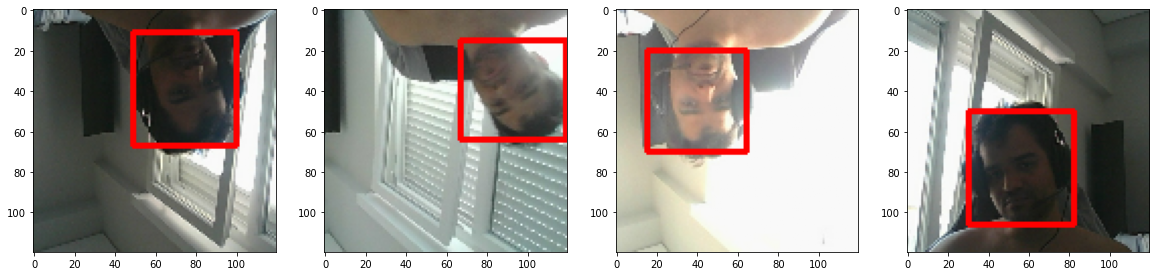

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

#  8

In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [77]:
vgg = VGG16(include_top=False)


In [78]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [79]:
facetracker = build_model()


In [80]:
facetracker.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_5[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [81]:
X, y = train.as_numpy_iterator().next()


In [82]:
X.shape


(8, 120, 120, 3)

In [83]:
classes, coords = facetracker.predict(X)


1/1 [==============================] - 1s 1s/step


In [84]:
classes, coords


(array([[0.46354324],
        [0.45436716],
        [0.43030918],
        [0.48396653],
        [0.4205831 ],
        [0.40270084],
        [0.41362414],
        [0.42451274]], dtype=float32),
 array([[0.6385817 , 0.64758015, 0.5553285 , 0.5089951 ],
        [0.63350725, 0.6021224 , 0.55586237, 0.6007342 ],
        [0.5996417 , 0.6870742 , 0.5719701 , 0.48319492],
        [0.56210136, 0.612204  , 0.5900546 , 0.48553732],
        [0.67961484, 0.6515003 , 0.56219643, 0.6186007 ],
        [0.60854167, 0.66367555, 0.56794643, 0.45323256],
        [0.67357117, 0.6150272 , 0.5630556 , 0.5337591 ],
        [0.65132093, 0.6110335 , 0.54927546, 0.5262497 ]], dtype=float32))

In [85]:

batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch


In [86]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)


In [87]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [88]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [89]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.842061>

In [90]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.83024746>

In [91]:
regressloss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=6.842061>

In [92]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)


In [93]:
model = FaceTracker(facetracker)


In [94]:
model.compile(opt, classloss, regressloss)


In [95]:
logdir='logs'


In [96]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [98]:
hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/3
308/308 [==============================] - 984s 3s/step - total_loss: 0.2510 - class_loss: 0.0623 - regress_loss: 0.2198 - val_total_loss: 0.0179 - val_class_loss: 2.0060e-04 - val_regress_loss: 0.0178
Epoch 2/3
308/308 [==============================] - 885s 3s/step - total_loss: 0.0345 - class_loss: 0.0023 - regress_loss: 0.0334 - val_total_loss: 0.0205 - val_class_loss: 1.5882e-04 - val_regress_loss: 0.0204
Epoch 3/3
308/308 [==============================] - 881s 3s/step - total_loss: 0.0110 - class_loss: 1.2984e-04 - regress_loss: 0.0109 - val_total_loss: 0.0105 - val_class_loss: 6.4376e-05 - val_regress_loss: 0.0105


In [99]:
hist.history

{'total_loss': [0.010869437828660011,
  0.004320429638028145,
  0.003604230936616659],
 'class_loss': [0.0004512049490585923,
  0.00028860315796919167,
  9.344029240310192e-05],
 'regress_loss': [0.010643835179507732,
  0.004176128190010786,
  0.0035575106739997864],
 'val_total_loss': [0.017891664057970047,
  0.02046312391757965,
  0.010524429380893707],
 'val_class_loss': [0.0002006001304835081,
  0.00015881888975854963,
  6.437642150558531e-05],
 'val_regress_loss': [0.01779136434197426,
  0.020383713766932487,
  0.010492241010069847]}

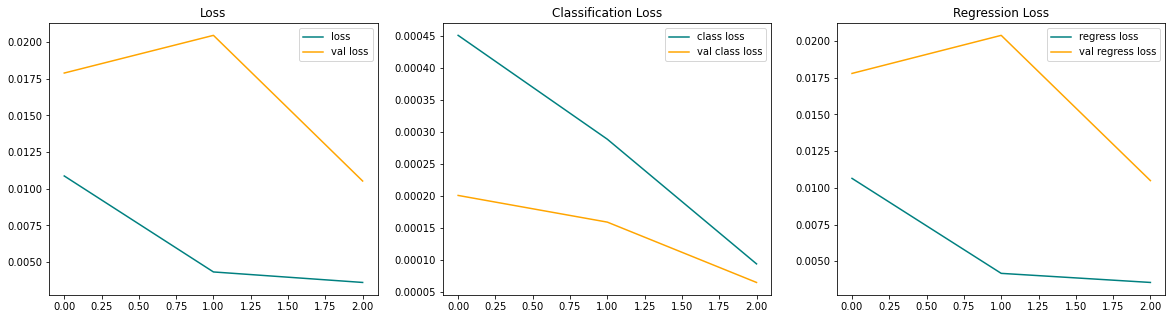

In [100]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [101]:
test_data = test.as_numpy_iterator()

In [102]:
test_sample = test_data.next()


In [103]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 806ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


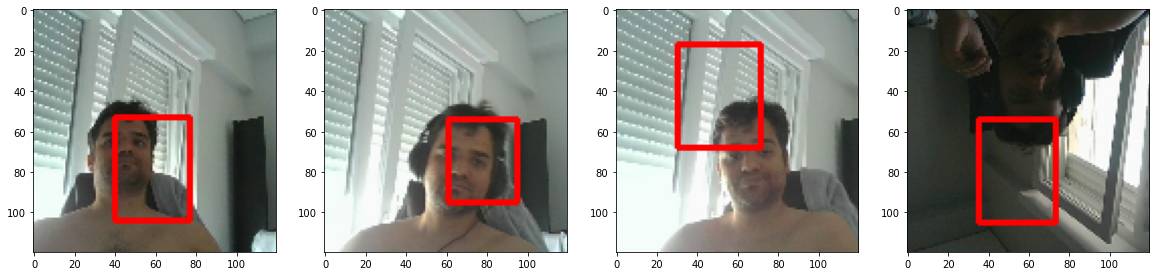

In [107]:
test_sample = test_data.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [160]:
from tensorflow.keras.models import load_model

In [148]:
facetracker.save('facetracker.h5')

In [149]:
facetracker = load_model('facetracker.h5')

TypeError: 'cv2.VideoCapture' object is not subscriptable

In [114]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 139ms/step


KeyboardInterrupt: 

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('EyeTrack', frame)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

cap.release()

cv2.destroyAllWindows()

In [ ]:
pip uninstall opencv-python

In [113]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('Frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
cap.release()
            
cv2.destroyAllWindows()

KeyboardInterrupt: 